In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

## Blurring

(([], []), ([], []))

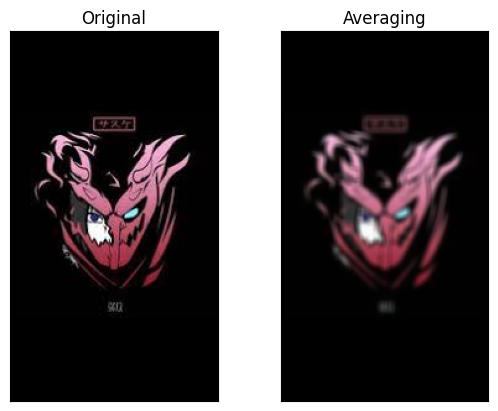

In [ ]:
import numpy as np
img = cv.imread('susanoo.jfif')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

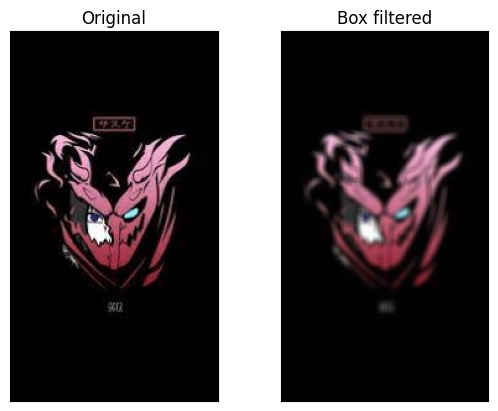

In [ ]:

blur = cv.boxFilter(img,-1,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Box filtered')
plt.xticks([]), plt.yticks([])
plt.show()

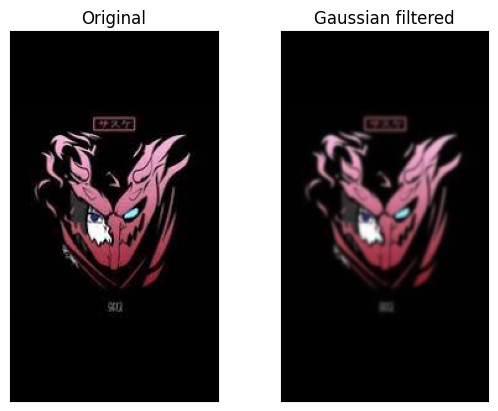

In [ ]:
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian filtered')
plt.xticks([]), plt.yticks([])
plt.show()

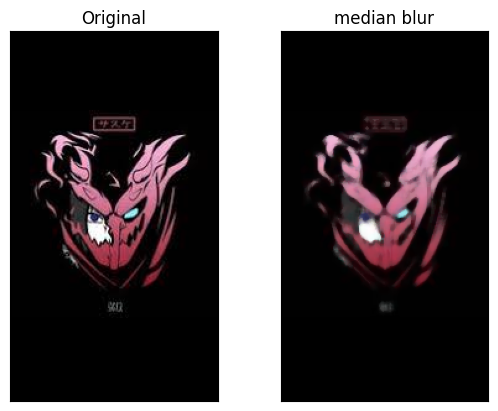

In [ ]:
blur = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('median blur')
plt.xticks([]), plt.yticks([])
plt.show()

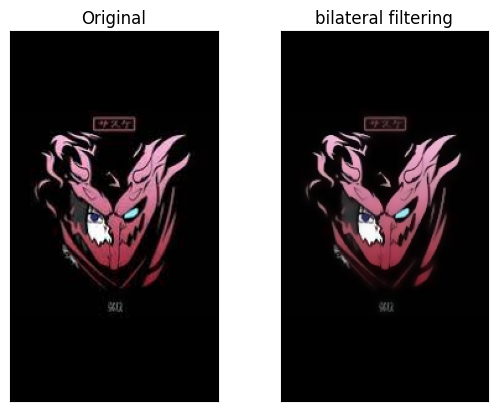

In [ ]:
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('bilateral filtering')
plt.xticks([]), plt.yticks([])
plt.show()

# Sharpening

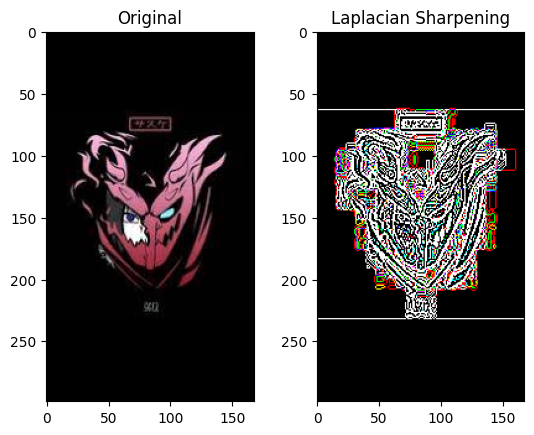

In [ ]:
import cv2

# Load the image
image = cv2.imread('susanoo.jfif')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Sharpen the image using the Laplacian operator
sharpened_image2 = cv2.Laplacian(image, cv2.CV_64F)

#Save the image
cv2.imwrite('Laplacian sharpened_image.jpg', sharpened_image2)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Laplacian Sharpening")
plt.imshow(sharpened_image2)
plt.show()


sobel

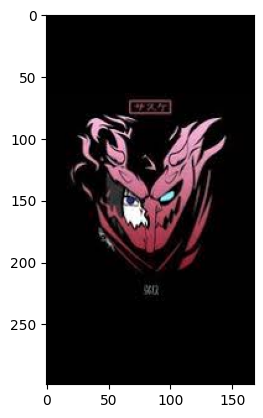

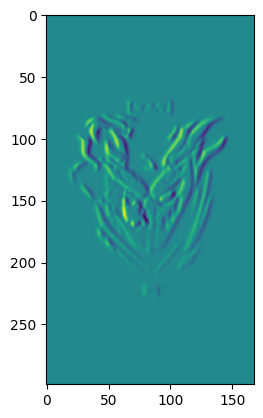

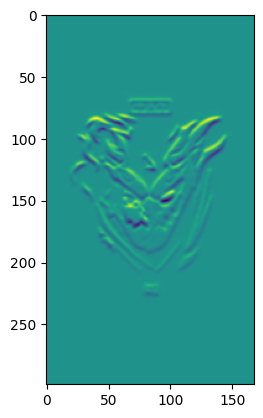

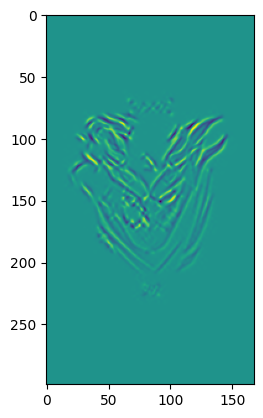

In [ ]:
img = cv2.imread('susanoo.jfif')
# Display original image
plt.imshow(img)
plt.show()


# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)
plt.show()
plt.imshow( sobelxy)
plt.show()

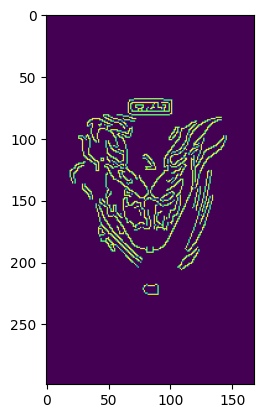

In [ ]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)
plt.show()

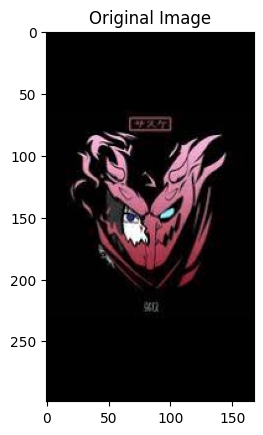

In [ ]:
img = cv2.imread('susanoo.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


plt.imshow(img)
plt.title("Original Image")
plt.show()

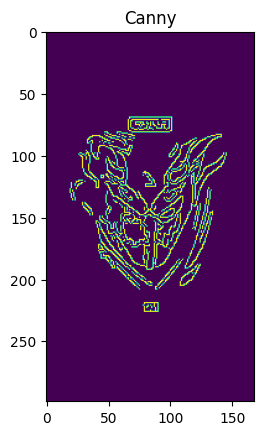

In [ ]:
plt.imshow(img_canny)
plt.title("Canny")
plt.show()

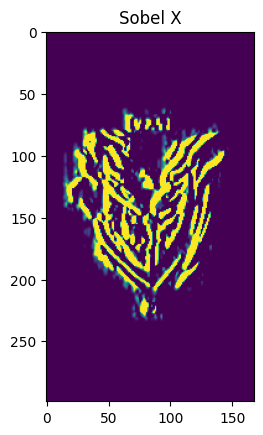

In [ ]:
plt.imshow(img_sobelx)
plt.title("Sobel X")
plt.show()

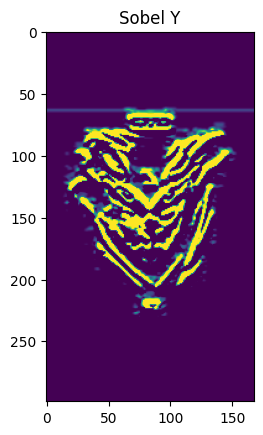

In [ ]:
plt.imshow(img_sobely)
plt.title("Sobel Y")
plt.show()

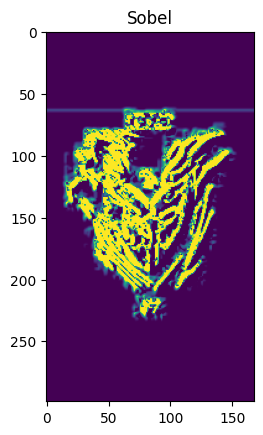

In [ ]:
plt.imshow(img_sobel)
plt.title("Sobel")
plt.show()

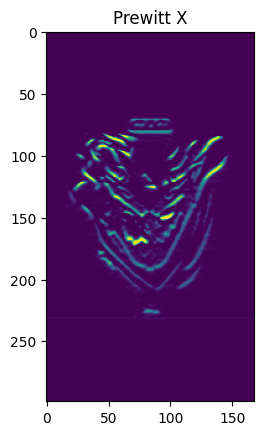

In [ ]:
plt.imshow(img_prewittx)
plt.title("Prewitt X")
plt.show()

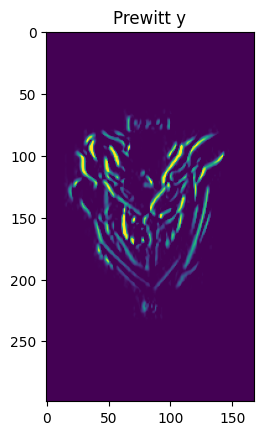

In [ ]:
plt.imshow(img_prewitty)
plt.title("Prewitt y")
plt.show()

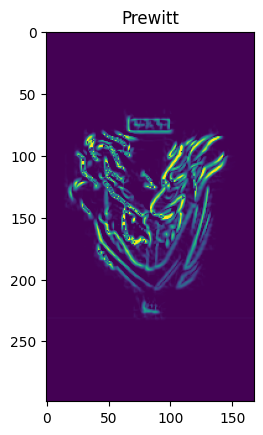

In [ ]:
plt.imshow(img_prewittx + img_prewitty)
plt.title("Prewitt")
plt.show()

In [ ]:
from scipy.ndimage.filters import median_filter

<ipython-input-29-e7b60c20c024>:1: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter


In [ ]:
def unsharp(image, sigma, strength):

    # Median filtering
    image_mf = median_filter(image, sigma)

    # Calculate the Laplacian
    lap = cv2.Laplacian(image_mf,cv2.CV_64F)

    # Calculate the sharpened image
    sharp = image-strength*lap

    # Saturate the pixels in either direction
    sharp[sharp>255] = 255
    sharp[sharp<0] = 0

    return sharp

In [ ]:
original_image = plt.imread('susanoo.jfif')

sharp1 = np.zeros_like(original_image)
for i in range(3):
    sharp1[:,:,i] = unsharp(original_image[:,:,i], 5, 0.8)

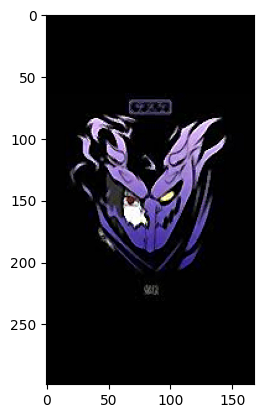

In [ ]:
plt.imshow(sharp1)
plt.show()

# Denoising

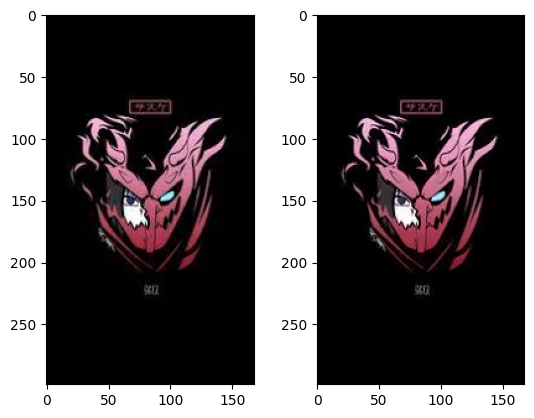

In [ ]:
img = cv.imread('susanoo.jfif')
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

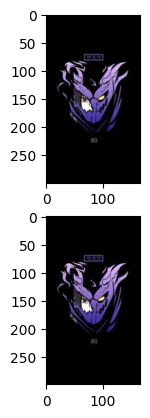

In [ ]:

img = cv2.imread('susanoo.jfif')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()